## Data Preprocessing - Python and Pandas

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df=pd.read_csv(r"c:\Users\goex1\Desktop\DS Projekte für GITHUB\IRIS\iris.data")

df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


## Variable names are not available in dataset. This is not good! We had to insert variable names!

In [165]:
df=pd.read_csv(r"c:\Users\goex1\Desktop\DS Projekte für GITHUB\IRIS\iris.data",
               header=None,
               names=["sepal length","sepal width","petal length", "petal width","class"])

## How much observations are in variables?


In [166]:

df.count()

sepal length    150
sepal width     150
petal length    150
petal width     150
class           150
dtype: int64

## How much observations are in variables - divided by class?


In [167]:
df.groupby("class").count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Identify duplicates


In [168]:

df[df.duplicated(keep=False)]


,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


## Delete duplicates


In [169]:

df=df.drop(df.index[9])
df=df.drop(df.index[34])
df=df.drop(df.index[101])


In [170]:
df.groupby("class").count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


## Insert deliberately typing mistake


In [171]:
df.loc[37,'class']='Iris-setsao'

In [172]:
df.groupby("class").count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,47,47,47,47
Iris-setsao,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


## Typing mistake - correction


In [173]:
#typing mistake correction

df.loc[37,'class']='Iris-setosa'


In [174]:
df.groupby("class").count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


## Insert deliberately outliers

In [175]:

df.loc[37, 'sepal length']=800
df.loc[66, 'sepal width']=999


## Identify outliers descriptive

In [176]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,147.000000,147.000000,147.000000,147.000000
mean,11.261224,9.829252,3.778912,1.208844
std,65.504852,82.145398,1.753206,0.759409
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,800.000000,999.000000,6.900000,2.500000


#There are max-values of 800 (feature sepal length) and 999 (feature sepal width) -> Potential Outlier

In [177]:
df.groupby('class').describe()


sepal length                                               \
                       count       mean         std  min  25%  50%    75%   
class                                                                       
Iris-setosa             48.0  21.572917  114.747393  4.3  4.8  5.0  5.225   
Iris-versicolor         50.0   5.936000    0.516171  4.9  5.6  5.9  6.300   
Iris-virginica          49.0   6.593878    0.641095  4.9  6.2  6.5  6.900   

                       sepal width             ... petal length       \
                   max       count       mean  ...          75%  max   
class                                          ...                     
Iris-setosa      800.0        48.0   3.429167  ...          1.6  1.9   
Iris-versicolor    7.0        50.0  22.690000  ...          4.6  5.1   
Iris-virginica     7.9        49.0   2.975510  ...          5.9  6.9   

                petal width                                               
                      count      mean       std  min  25%  50%  75%  max  
class                                                                     
Iris-setosa            48.0  0.247917  0.107168  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor        50.0  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica         49.0  2.030612  0.275533  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Identify outliers grafically

class
Iris-setosa        [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-versicolor    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-virginica     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

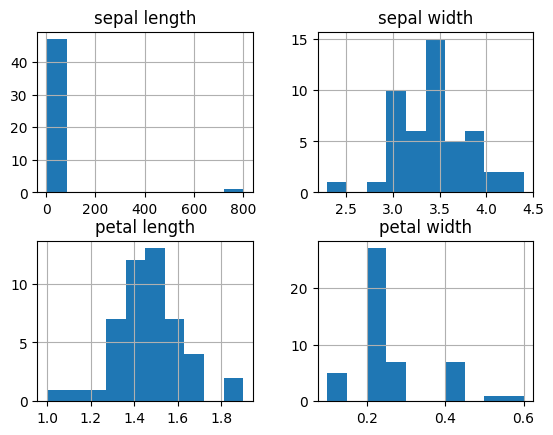

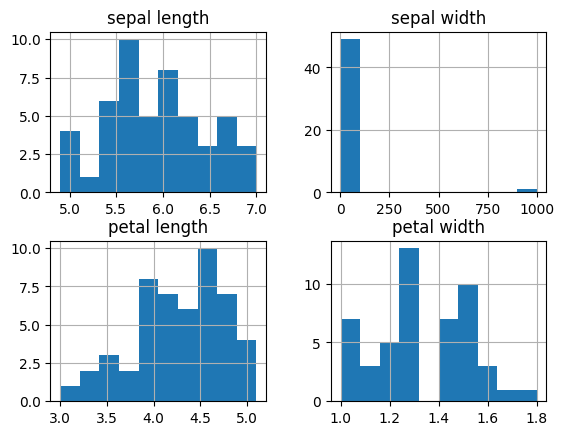

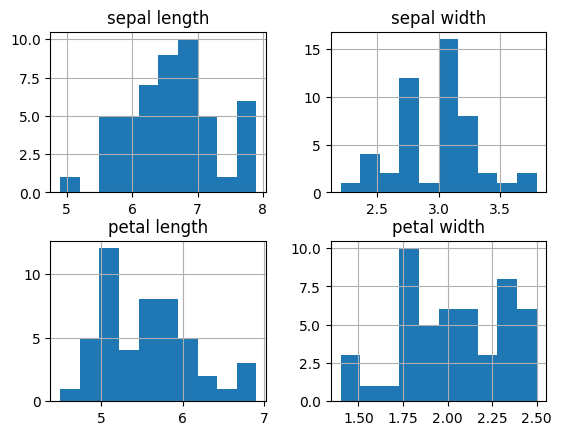

In [178]:
df.groupby('class').hist()

#There are only one value =  800 (feature sepal length) and only one value =999 (feature sepal width) -> Potential Outlier

In [179]:
print(df[df['sepal length']==800])

    sepal length  sepal width  petal length  petal width        class
37         800.0          3.1           1.5          0.1  Iris-setosa


In [180]:
print(df[df['sepal width']==999])

    sepal length  sepal width  petal length  petal width            class
66           5.6        999.0           4.5          1.5  Iris-versicolor


## Replace the outlier with the median value of the remaining data sets.

In [185]:
df.loc[37,'sepal length'] = 5.8


In [186]:
df.loc[66,'sepal width'] = 3.0


In [187]:
print(df.groupby('class').describe())


                sepal length                                                 \
                       count      mean       std  min  25%  50%    75%  max   
class                                                                         
Iris-setosa             48.0  5.027083  0.376851  4.3  4.8  5.0  5.225  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.300  7.0   
Iris-virginica          49.0  6.593878  0.641095  4.9  6.2  6.5  6.900  7.9   

                sepal width            ... petal length      petal width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            48.0  3.429167  ...          1.6  1.9        48.0   
Iris-versicolor        50.0  2.770000  ...          4.6  5.1        50.0   
Iris-virginica         49.0  2.975510  ...          5.9  6.9        49.0   

                                                              
     

## Correlation of features in dataset

<Axes: >

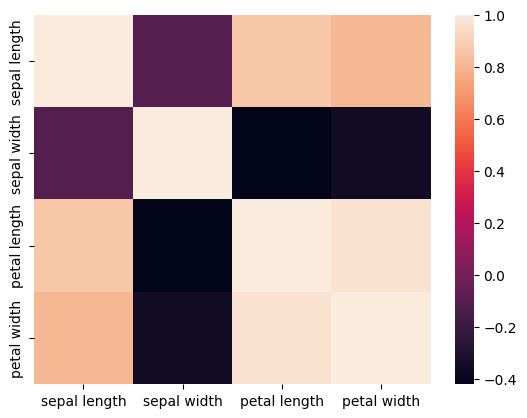

In [198]:
corrmat=df.corr(method='pearson',numeric_only=True)
sns.heatmap(corrmat)
